Projeto 1 — Teoria e Aplicação de Grafos (TAG) — 2025/2
Universidade de Brasília — Departamento de Ciência da Computação
Professor: Díbio
Autores:
Inácio Leal do Rosário - 232011331
João Marcelo Costa Santana - 232023790

Descrição:
    Este script realiza a construção e análise de uma rede social a partir
    do conjunto de dados "Facebook Ego-Networks" (SNAP - Stanford Network Analysis Project).
    O objetivo é identificar padrões de conectividade, comunidades e nós de maior
    influência em um subgrafo amostrado com 2000 nós.

Etapas principais:
    1. Leitura dos arquivos ".edges" e construção do grafo completo.
    2. Extração aleatória de 2000 nós e criação de um subgrafo.
    3. Detecção de comunidades usando o algoritmo de Louvain.
    4. Cálculo das centralidades:
        - Grau
        - Intermediação (Betweenness)
        - Proximidade (Closeness)
        - Autovetor (Eigenvector)
    5. Visualização das comunidades e das medidas de centralidade.
    6. Geração da imagem "analise_completa.png" com todos os resultados.

Bibliotecas utilizadas:
    - pandas
    - networkx
    - matplotlib
    - community (python-louvain)
    - glob
    - random

Saída:
    - Impressões no terminal com estatísticas da rede.
    - Figura "analise_completa.png" com as visualizações.



In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import glob

import community as community_louvain



In [2]:
# --- 1. Construir o Grafo Completo ---
G_completo = nx.Graph()

# Encontra todos os arquivos .edges na pasta 'facebook/'
caminho_dados = 'facebook/*.edges'
arquivos_arestas = glob.glob(caminho_dados)

print(f"Construindo o grafo completo a partir de {len(arquivos_arestas)} arquivos de ego-networks...")

for arquivo in arquivos_arestas:
    # Extrai o ID do nó ego a partir do nome do arquivo
    try:
        # Tenta extrair o número do nome do arquivo. Ex: 'facebook/107.edges' -> 107
        ego_node = int(arquivo.split('/')[-1].split('.')[0])
    except ValueError:
        continue # Pula arquivos que não têm um ID numérico

    # Lê as conexões entre os amigos do ego
    df_arestas = pd.read_csv(arquivo, sep=' ', header=None)

    # Adiciona as arestas entre os amigos ao grafo completo
    for index, row in df_arestas.iterrows():
        G_completo.add_edge(row[0], row[1])

    # Encontra todos os amigos únicos mencionados no arquivo
    amigos_do_ego = set(df_arestas[0]).union(set(df_arestas[1]))

    # Adiciona a conexão do ego a cada um de seus amigos
    for amigo in amigos_do_ego:
        G_completo.add_edge(ego_node, amigo)

print("\n--- Grafo Completo Construído ---")
print(f"Número total de nós: {G_completo.number_of_nodes()}")
print(f"Número total de arestas: {G_completo.number_of_edges()}")


Construindo o grafo completo a partir de 10 arquivos de ego-networks...

--- Grafo Completo Construído ---
Número total de nós: 3963
Número total de arestas: 88156


In [ ]:

# --- 2. Extrair a Amostra e Criar o Subgrafo ---
populacao_de_nos = list(G_completo.nodes())
tamanho_da_amostra = 2000

amostra_aleatoria = random.sample(populacao_de_nos, tamanho_da_amostra)
G_subgrafo = G_completo.subgraph(amostra_aleatoria)

print("\n--- Subgrafo Aleatório Criado ---")
print(f"Nós no subgrafo: {G_subgrafo.number_of_nodes()}")
print(f"Arestas no subgrafo: {G_subgrafo.number_of_edges()}")



--- Subgrafo Aleatório Criado ---
Nós no subgrafo: 2000
Arestas no subgrafo: 22191



Gerando a visualização...


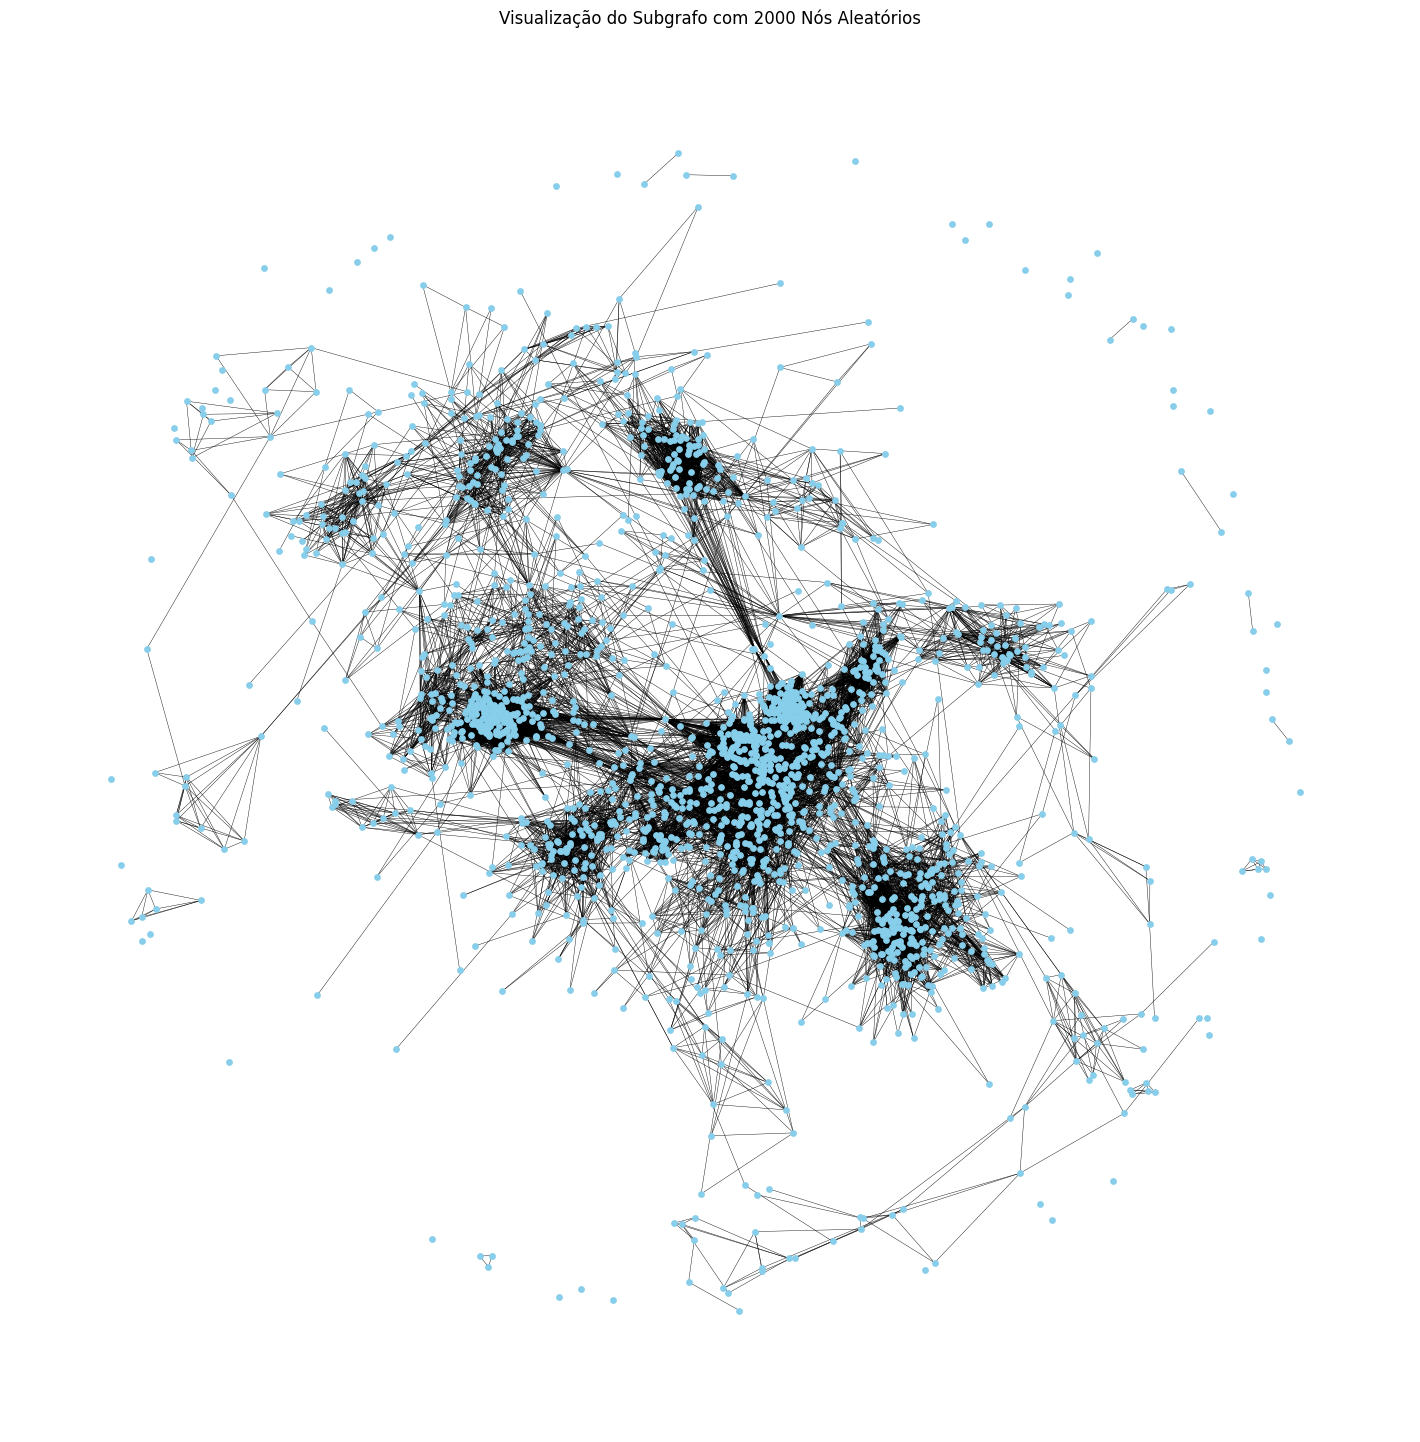

In [4]:
# --- 3. Visualizar o Subgrafo ---
print("\nGerando a visualização...")
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_subgrafo, iterations=30)
nx.draw(G_subgrafo, pos, with_labels=False, node_size=15, width=0.3, node_color='skyblue')
plt.title(f"Visualização do Subgrafo com {tamanho_da_amostra} Nós Aleatórios")
plt.show()



In [5]:
# --- 4. Analise de comunidades
print("\n--- Análise do Subgrafo (2000 nós) ---")

# 4.1 Algoritmo  de Louvain
print("Detectando comunidades com algoritmo de Louvain...")
partition = community_louvain.best_partition(G_subgrafo)

# 4.2 Medidas de centralidades
print("Calculando medidas de centralidade...")

# ◦ Grau de centralidade
degree_centrality = nx.degree_centrality(G_subgrafo)

# ◦ Centralidade de intermediação
betweenness_centrality = nx.betweenness_centrality(G_subgrafo)

# ◦ Centralidade de proximidade
closeness_centrality = nx.closeness_centrality(G_subgrafo)

# ◦ Centralidade de autovetor
eigenvector_centrality = nx.eigenvector_centrality(G_subgrafo, max_iter=1000)



--- Análise do Subgrafo (2000 nós) ---
Detectando comunidades com algoritmo de Louvain...
Calculando medidas de centralidade...



--- Visualização dos Resultados ---


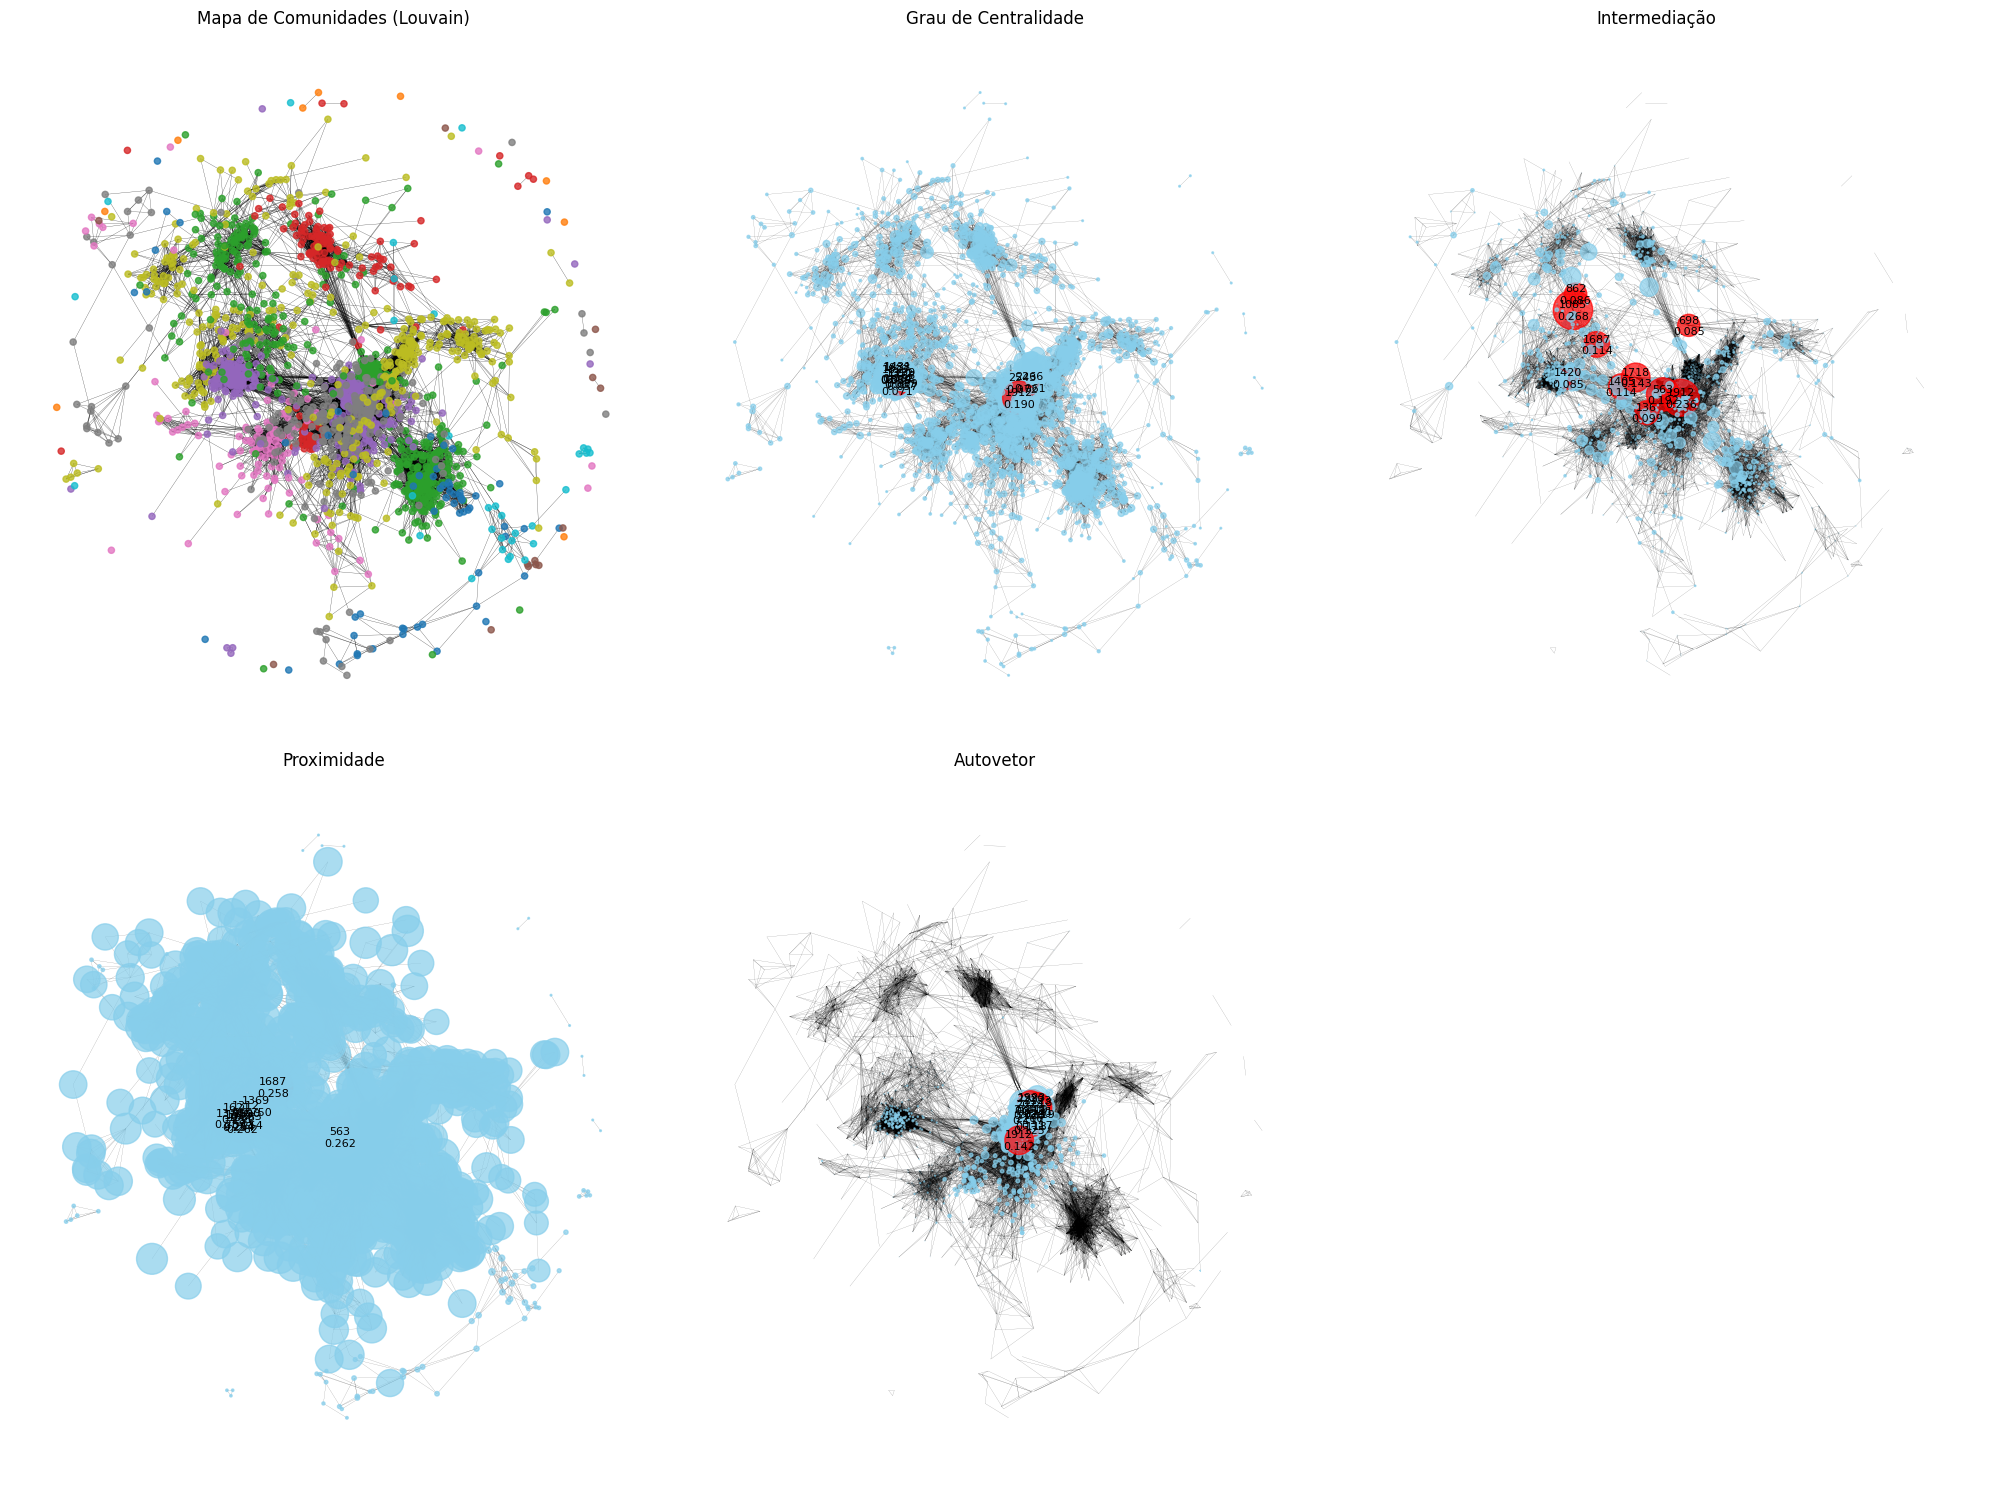

In [6]:

# --- 5. Visualização da analise ---
print("\n--- Visualização dos Resultados ---")

# 4.1 Visualizar comunidades
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
cmap = plt.cm.tab10
colors = [cmap(partition[node] % 10) for node in G_subgrafo.nodes()]
nx.draw(G_subgrafo, pos, node_size=20, node_color=colors, alpha=0.8, width=0.2)
plt.title("Mapa de Comunidades (Louvain)")

# 4.2 Visualizar centralidades
centralidades = [
    ("Grau de Centralidade", degree_centrality),
    ("Intermediação", betweenness_centrality),
    ("Proximidade", closeness_centrality),
    ("Autovetor", eigenvector_centrality)
]

for i, (titulo, centralidade) in enumerate(centralidades, 2):
    plt.subplot(2, 3, i)

    # Encontra os 10 nós mais centrais
    top_nodes = sorted(centralidade.items(), key=lambda x: x[1], reverse=True)[:10]
    top_10_nodes = [node for node, value in top_nodes]

    # Calcula tamanho dos nós proporcional à centralidade
    node_sizes = [3000 * centralidade[node] for node in G_subgrafo.nodes()]

    # Destaca os top 10 nós
    highlight_nodes = [node for node in G_subgrafo.nodes() if node in top_10_nodes]
    highlight_sizes = [5000 * centralidade[node] for node in highlight_nodes]
    highlight_colors = ['red' if node in top_10_nodes else 'skyblue' for node in G_subgrafo.nodes()]

    nx.draw(G_subgrafo, pos, node_size=node_sizes, node_color=highlight_colors,
            alpha=0.7, width=0.1, with_labels=False)

    # Adicionar rótulos apenas para os top 10 nós
    labels = {node: f"{node}\n{centralidade[node]:.3f}" for node in top_10_nodes}
    nx.draw_networkx_labels(G_subgrafo, pos, labels, font_size=8, font_color='black')

    plt.title(titulo)

plt.tight_layout()
plt.savefig('analise_completa.png', dpi=300, bbox_inches='tight')
plt.show()